# Deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [2]:
df = pd.read_csv('laptop_price.csv', encoding='latin-1')

# Deskripsi Dataset

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Menghitung Total Kolom dan Baris Dataset

In [4]:
df.shape

(1303, 13)

# Informasi Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
df.duplicated().sum()

0

# Cek Missing Value

In [7]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

# Prepocessing Data dan Cleaning Data

In [8]:
# Drop kolom yang tidak diperlukan
df.drop(columns=['laptop_ID'], inplace=True)

In [9]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [10]:
# Remove GB dan Kg pada kolom Ram dan dan Weight
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [11]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [12]:
# Ubah tipe data kolom Ram dan Weight menjadi int dan float
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(8)
memory usage: 112.1+ KB


In [14]:
df.drop(columns=['Product'],inplace=True)

In [15]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


  # EDA (Exploratory Data Analysis)

C:\Users\Itsna Maulana\AppData\Local\Temp\ipykernel_4600\2073861339.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

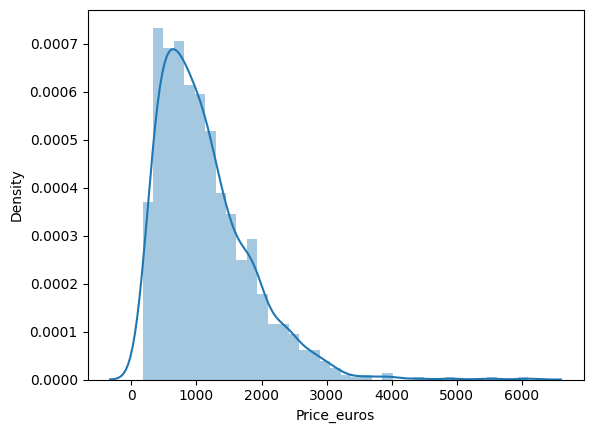

In [16]:
sns.distplot(df['Price_euros'])

<Axes: xlabel='Company'>

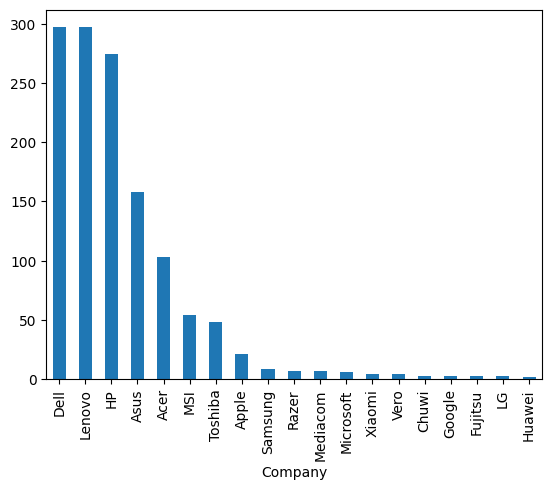

In [17]:
# Company Analysis
df['Company'].value_counts().plot(kind='bar')

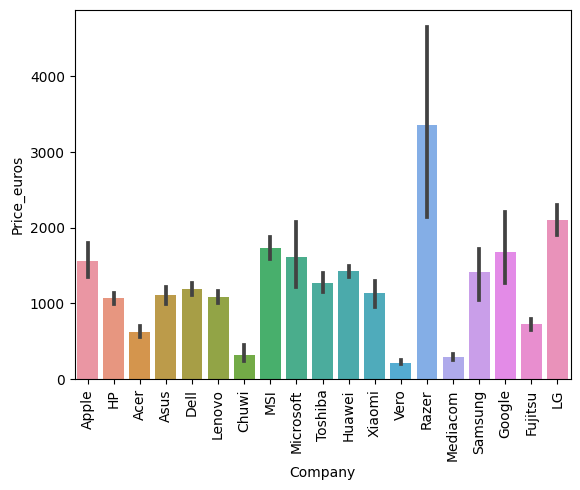

In [18]:
# Rata-rata harga dari setiap brand
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

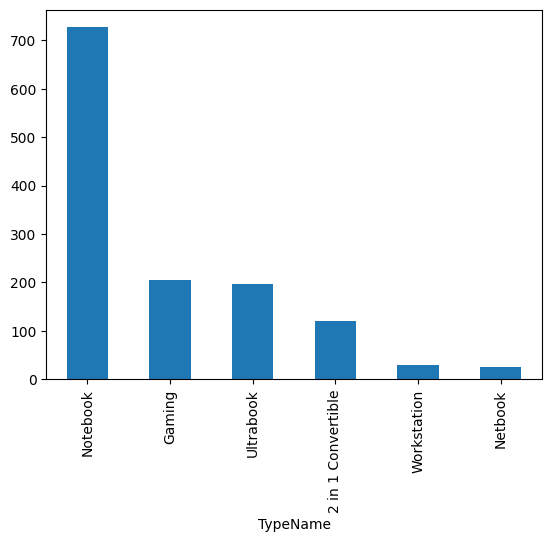

In [19]:
# TypeName Analysis
df['TypeName'].value_counts().plot(kind='bar')

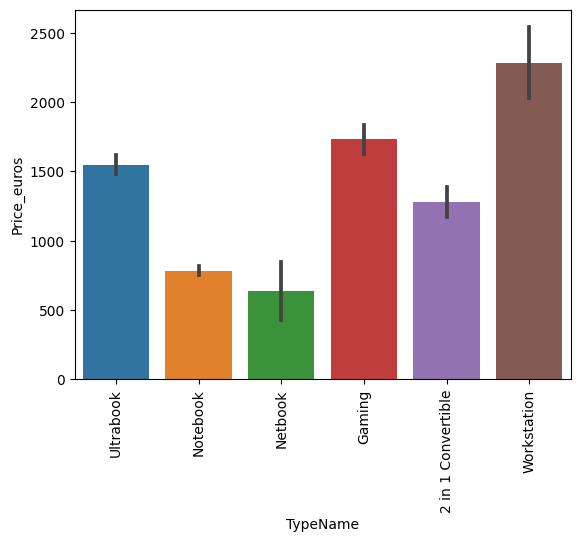

In [20]:
# Rata-rata harga dari setiap type laptop
sns.barplot(x=df['TypeName'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Itsna Maulana\AppData\Local\Temp\ipykernel_4600\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

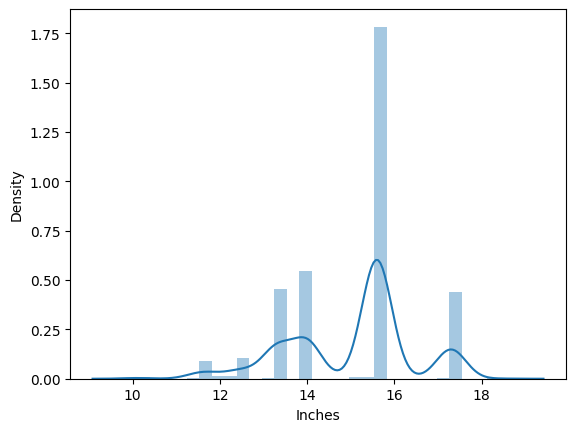

In [21]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price_euros'>

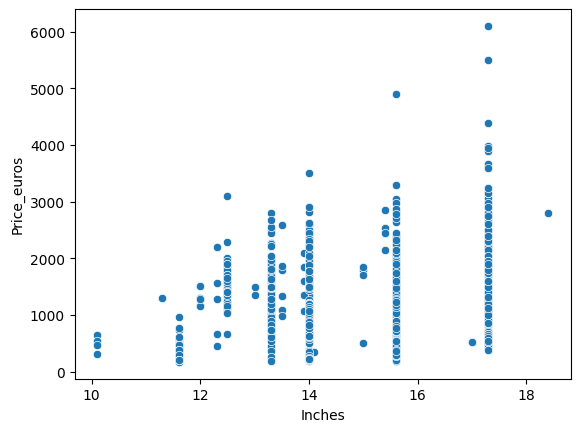

In [22]:
sns.scatterplot(x=df['Inches'],y=df['Price_euros'])

In [23]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [24]:
# Menambahkan kolom baru dengan informasi touchscreen
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
981,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 7,1.20,1195.00,0
942,Acer,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.23,619.00,0
635,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.99,906.62,0
775,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,2TB HDD,Nvidia GeForce 940MX,Windows 10,2.30,839.00,1
387,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i5 6440HQ 2.6GHz,8,500GB HDD,AMD FirePro W5130M,Windows 10,2.23,1369.00,0


<Axes: xlabel='Touchscreen', ylabel='Price_euros'>

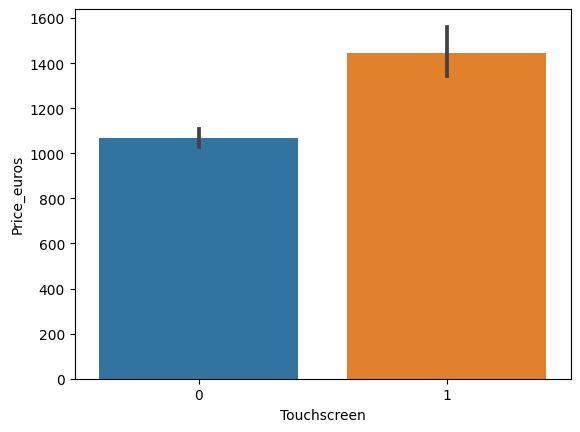

In [25]:
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'])

In [26]:
# Menambahkan kolom baru dengan informasi IPS
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips
1239,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.40,1499.00,0,1
375,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon R5,Windows 10,1.91,488.99,0,0
380,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.35,1191.00,0,1
959,Acer,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,389.00,1,1
614,Dell,Notebook,15.6,1366x768,Intel Core i5 7300U 2.6GHz,4,500GB HDD,Intel HD Graphics 620,Linux,1.93,869.00,0,0


<Axes: xlabel='Ips'>

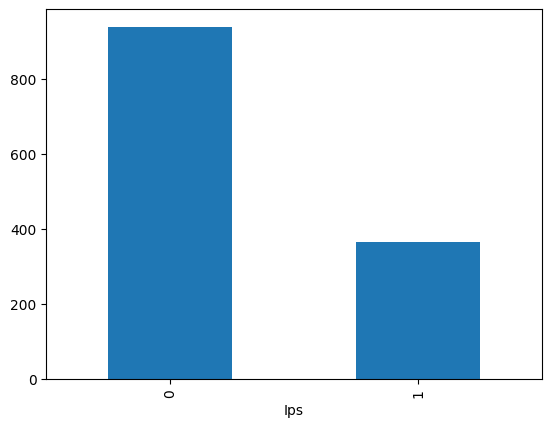

In [27]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price_euros'>

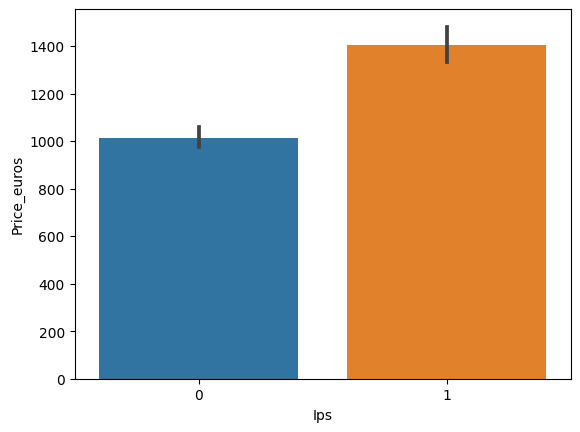

In [28]:
sns.barplot(x=df['Ips'],y=df['Price_euros'])

In [29]:
# Merapikan kolom ScreenResolution

df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips
0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,Apple,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


In [30]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [31]:
# Menambah kolom baru CPU name
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,Cpu Name
0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Intel Core i5
3,Apple,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,Intel Core i7
4,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,Intel Core i5


In [32]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [33]:
# Memilah jenis processor laptop
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
        
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,Cpu Name,Cpu brand
0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

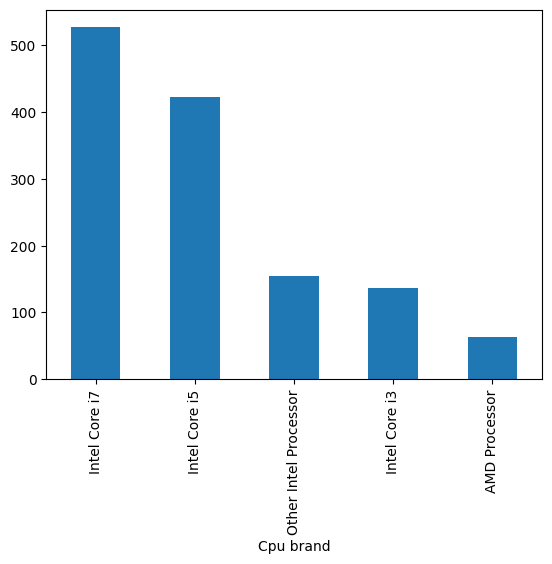

In [34]:
df['Cpu brand'].value_counts().plot(kind='bar')

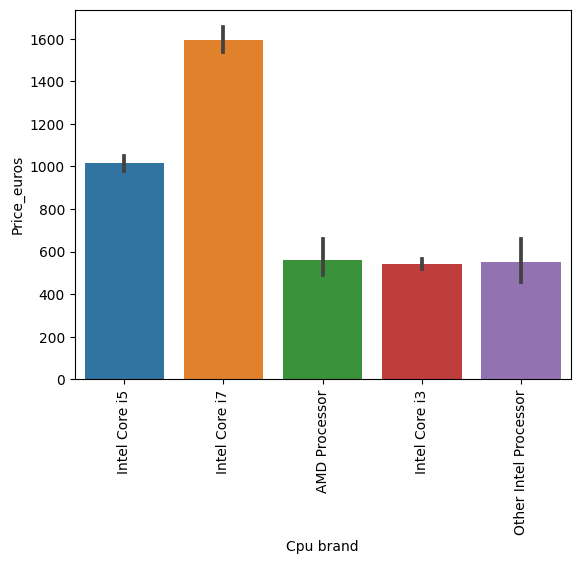

In [35]:
sns.barplot(x=df['Cpu brand'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [36]:
# Menghapus kolom Cpu dan Cpu Name
df.drop(columns=['Cpu','Cpu Name'],inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,Cpu brand
0,Apple,Ultrabook,13.3,2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5
2,HP,Notebook,15.6,1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Intel Core i5
3,Apple,Ultrabook,15.4,2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,Intel Core i7
4,Apple,Ultrabook,13.3,2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,Intel Core i5


<Axes: xlabel='Ram'>

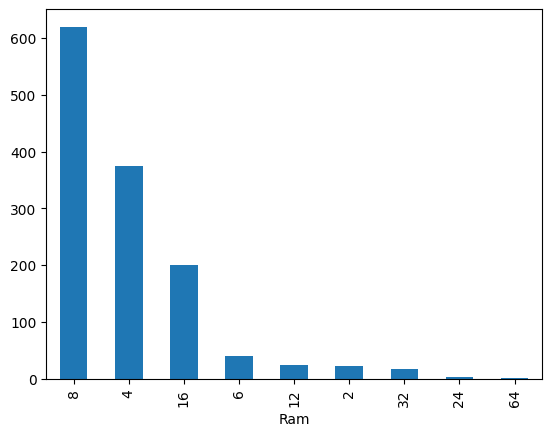

In [37]:
df['Ram'].value_counts().plot(kind='bar')

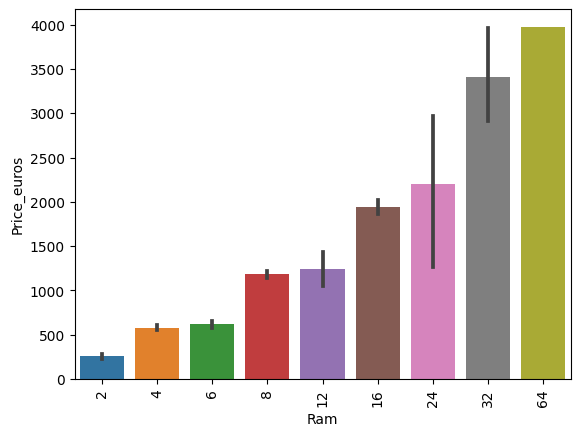

In [38]:
sns.barplot(x=df['Ram'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [39]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [40]:
# Memilah jenis memory laptop
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '', regex=True)

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex=True)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [41]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
915,Lenovo,Notebook,13.3,1920x1080,4,128 SSD,Intel HD Graphics 620,Windows 10,1.44,881.0,0,0,Intel Core i5,0,128,0,0
247,Asus,Gaming,17.3,1920x1080,16,256 SSD,Nvidia GeForce GTX 1080,Windows 10,3.60,2999.0,0,0,Intel Core i7,0,256,0,0
301,Asus,Gaming,17.3,1920x1080,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,2.90,2122.0,0,0,Intel Core i7,1000,256,0,0
600,HP,Notebook,15.6,1920x1080,8,256 SSD,Intel HD Graphics 620,Windows 10,1.84,1219.0,0,0,Intel Core i7,0,256,0,0
593,Samsung,Notebook,15.6,1920x1080,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,1699.0,0,0,Intel Core i7,1000,128,0,0


In [42]:
# Menghapus kolom memory
df.drop(columns=['Memory'],inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,1920x1080,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,2880x1800,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,Intel Core i5,0,256,0,0


In [43]:
# Korelasi terhadap harga
numerical_columns = df.select_dtypes(include=[np.number])
correlation = numerical_columns.corr()['Price_euros']
print(correlation)

Inches           0.068197
Ram              0.743007
Weight           0.210370
Price_euros      1.000000
Touchscreen      0.191226
Ips              0.252208
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64


In [44]:
# Menghapua kolom Hybrid dan Flash Storage
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,Cpu brand,HDD,SSD
0,Apple,Ultrabook,13.3,2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5,0,128
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5,0,0
2,HP,Notebook,15.6,1920x1080,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Intel Core i5,0,256
3,Apple,Ultrabook,15.4,2880x1800,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,Intel Core i7,0,512
4,Apple,Ultrabook,13.3,2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,Intel Core i5,0,256


In [45]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [46]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,13.3,2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,1920x1080,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,2880x1800,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,Intel Core i5,0,256,Intel


In [47]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

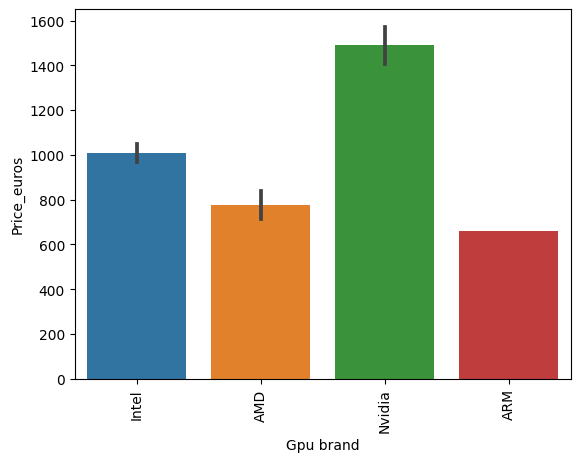

In [48]:
sns.barplot(x=df['Gpu brand'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [49]:
# Menghapus kolom Gpu
df.drop(columns=['Gpu'],inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price_euros,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,13.3,2560x1600,8,macOS,1.37,1339.69,0,1,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,0,0,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,1920x1080,8,No OS,1.86,575.00,0,0,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,2880x1800,16,macOS,1.83,2537.45,0,1,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,2560x1600,8,macOS,1.37,1803.60,0,1,Intel Core i5,0,256,Intel


In [50]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

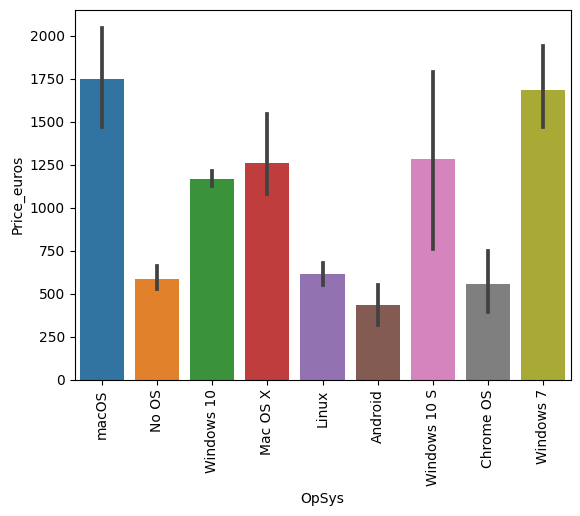

In [51]:
sns.barplot(x=df['OpSys'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
# Memilah jenis operation system
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

df['os'] = df['OpSys'].apply(cat_os)
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price_euros,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,13.3,2560x1600,8,macOS,1.37,1339.69,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,898.94,0,0,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,1920x1080,8,No OS,1.86,575.00,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,2880x1800,16,macOS,1.83,2537.45,0,1,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,2560x1600,8,macOS,1.37,1803.60,0,1,Intel Core i5,0,256,Intel,Mac


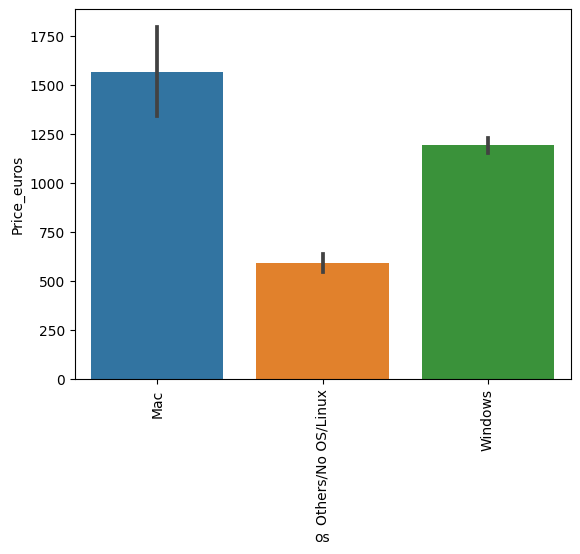

In [53]:
# Menghapus kolom OpSys
df.drop(columns=['OpSys'],inplace=True)

sns.barplot(x=df['os'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Weight,Price_euros,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,13.3,2560x1600,8,1.37,1339.69,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,1440x900,8,1.34,898.94,0,0,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,1920x1080,8,1.86,575.00,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,2880x1800,16,1.83,2537.45,0,1,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,2560x1600,8,1.37,1803.60,0,1,Intel Core i5,0,256,Intel,Mac


# Modelling

<Axes: >

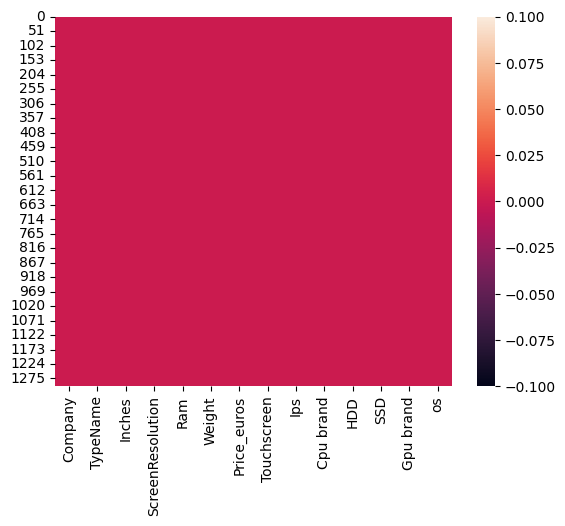

In [55]:
sns.heatmap(df.isnull())

In [56]:
df.describe()

,Inches,Ram,Weight,Price_euros,Touchscreen,Ips,HDD,SSD
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,1123.686992,0.147352,0.280123,413.783576,183.732924
std,1.426304,5.084665,0.665475,699.009043,0.354593,0.449231,515.818779,186.966903
min,10.100000,2.000000,0.690000,174.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,4.000000,1.500000,599.000000,0.000000,0.000000,0.000000,0.000000
50%,15.600000,8.000000,2.040000,977.000000,0.000000,0.000000,0.000000,256.000000
75%,15.600000,8.000000,2.300000,1487.880000,0.000000,1.000000,1000.000000,256.000000
max,18.400000,64.000000,4.700000,6099.000000,1.000000,1.000000,2000.000000,1024.000000


- Visualisasi Data

<Axes: >

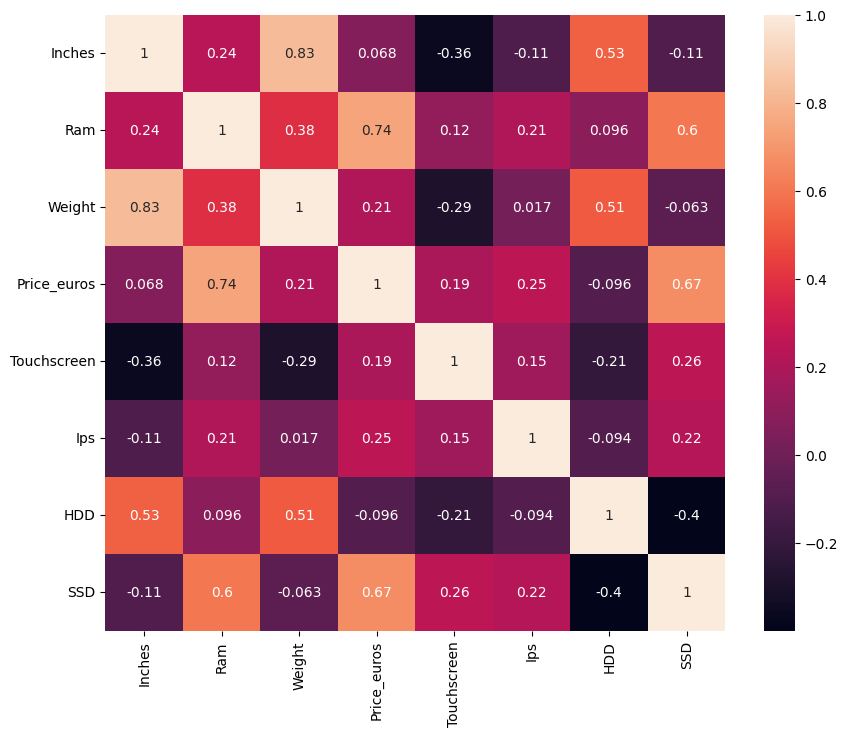

In [60]:
numerical_columns = df.select_dtypes(include=[np.number])
correlation = numerical_columns.corr()
plt.figure(figsize=(10,8))
sns.heatmap(numerical_columns.corr(),annot=True)

- Jumlah laptop berdasarkan merk

In [62]:
Merk = df.groupby('Company').count()[['Price_euros']].sort_values(by='Price_euros',ascending=True).reset_index()
Merk = Merk.rename(columns={'Price_euros':'numberOfLaptops'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Huawei'),
  Text(1, 0, 'LG'),
  Text(2, 0, 'Chuwi'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Fujitsu'),
  Text(5, 0, 'Vero'),
  Text(6, 0, 'Xiaomi'),
  Text(7, 0, 'Microsoft'),
  Text(8, 0, 'Mediacom'),
  Text(9, 0, 'Razer'),
  Text(10, 0, 'Samsung'),
  Text(11, 0, 'Apple'),
  Text(12, 0, 'Toshiba'),
  Text(13, 0, 'MSI'),
  Text(14, 0, 'Acer'),
  Text(15, 0, 'Asus'),
  Text(16, 0, 'HP'),
  Text(17, 0, 'Lenovo'),
  Text(18, 0, 'Dell')])

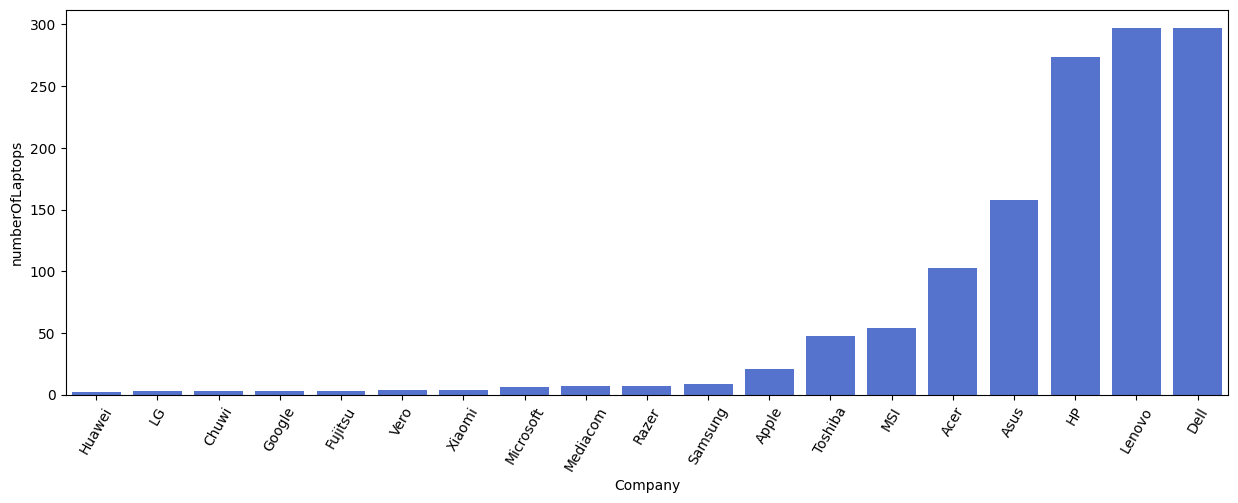

In [63]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=Merk['Company'], y=Merk['numberOfLaptops'], color='royalblue')
plt.xticks(rotation=60)

- Jumlah laptop berdasarkan memori HDD

In [64]:
Memori= df.groupby('HDD').count()[['Price_euros']].sort_values(by='Price_euros').reset_index()
Memori = Memori.rename(columns={'Price_euros':'count'})

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '32'),
  Text(2, 0, '128'),
  Text(3, 0, '500'),
  Text(4, 0, '1000'),
  Text(5, 0, '2000')])

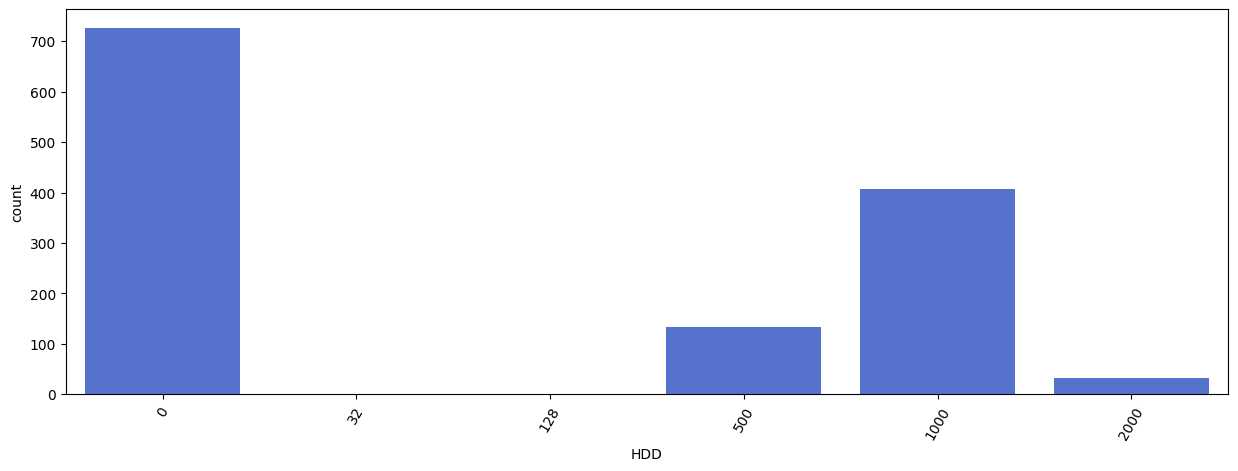

In [65]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=Memori['HDD'], y=Memori['count'], color='royalblue')
plt.xticks(rotation=60)

- Jumlah laptop berdasarkan memori SSD

In [66]:
Memori= df.groupby('SSD').count()[['Price_euros']].sort_values(by='Price_euros').reset_index()
Memori = Memori.rename(columns={'Price_euros':'count'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '0'),
  Text(1, 0, '8'),
  Text(2, 0, '16'),
  Text(3, 0, '32'),
  Text(4, 0, '64'),
  Text(5, 0, '128'),
  Text(6, 0, '180'),
  Text(7, 0, '240'),
  Text(8, 0, '256'),
  Text(9, 0, '512'),
  Text(10, 0, '768'),
  Text(11, 0, '1000'),
  Text(12, 0, '1024')])

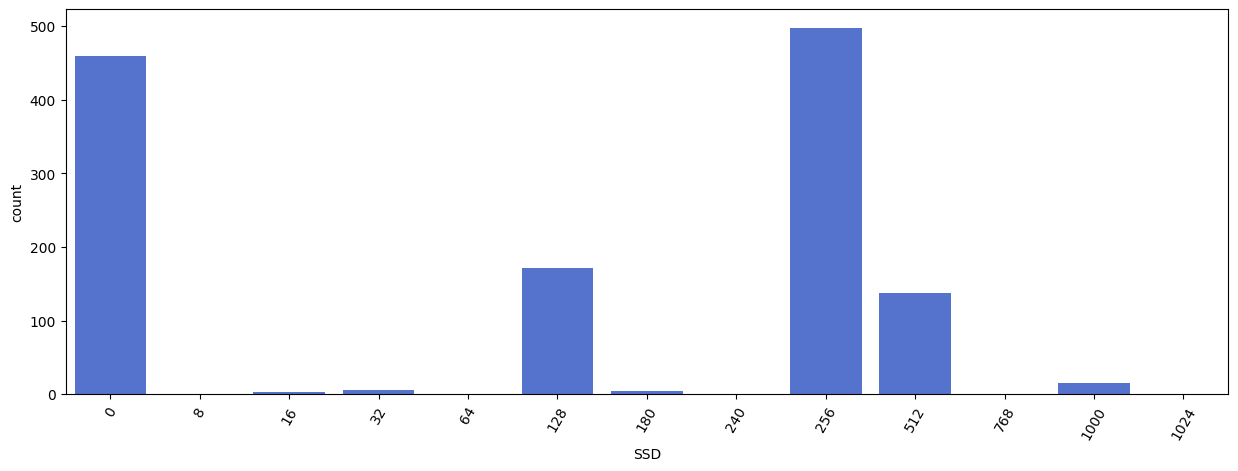

In [67]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=Memori['SSD'], y=Memori['count'], color='royalblue')
plt.xticks(rotation=60)

- Distribusi SSD

C:\Users\Itsna Maulana\AppData\Local\Temp\ipykernel_4600\3684852730.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ram'])


<Axes: xlabel='Ram', ylabel='Density'>

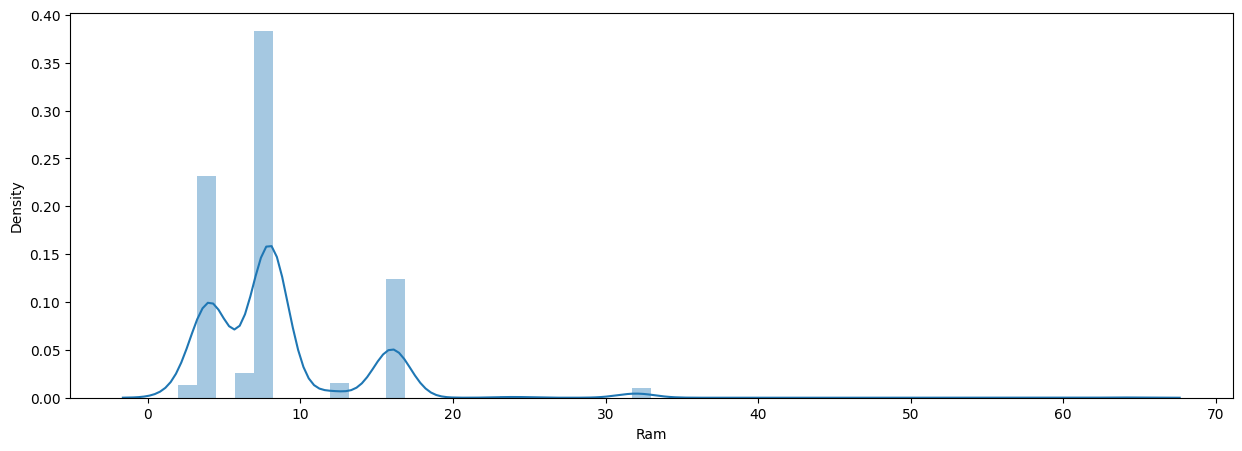

In [69]:
plt.figure(figsize=(15,5))
sns.distplot(df['Ram'])

- Distribusi harga

C:\Users\Itsna Maulana\AppData\Local\Temp\ipykernel_4600\178916287.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

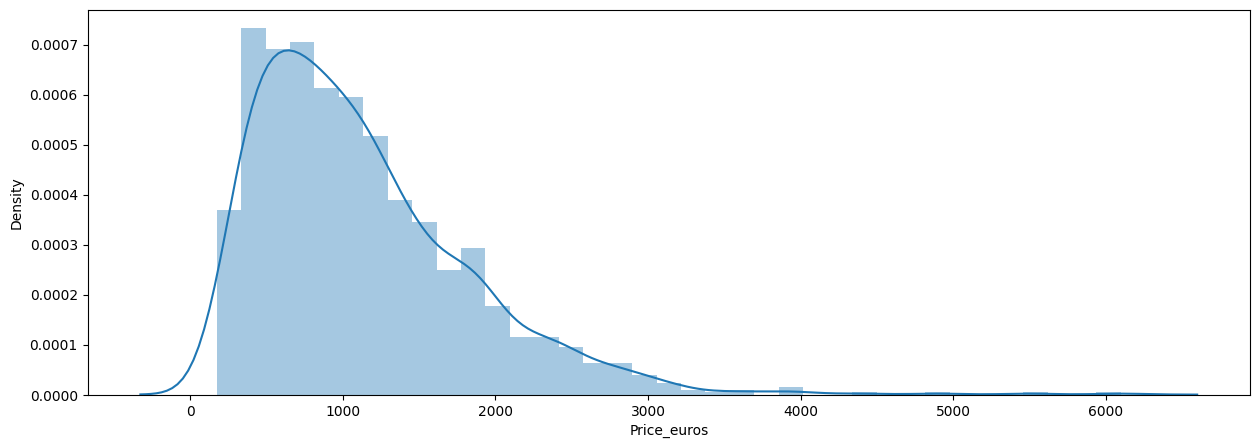

In [70]:
plt.figure(figsize=(15,5))
sns.distplot(df['Price_euros'])

In [ ]:
df.info()

- Seleksi Fitur

In [72]:
features = ['Ram','Weight','Touchscreen','Ips', 'HDD', 'SSD']
x = df[features]
y = df['Price_euros']
x.shape, y.shape

((1303, 6), (1303,))

- Split data training dan data testing

In [73]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(326,)

- Membuat model regresi linier

In [74]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)


In [75]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.626798000136918


# Evaluation

- Membuat inputan model regresi linier


In [76]:
#['Ram(GB)','Weight(KG)','Touchscreen','Ips', 'HDD', 'SSD']
input_data = np.array([[8,15.4,0,1,0,512]])

prediction = lr.predict(input_data)
print('Estimasi harga Laptop dalam euro :', prediction)

Estimasi harga Laptop dalam euro : [2560.15910962]


c:\users\itsna maulana\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


- Save model

In [78]:
import pickle

filename = 'estimasi_harga_laptop.sav'
pickle.dump(lr,open(filename,'wb'))

<Axes: >

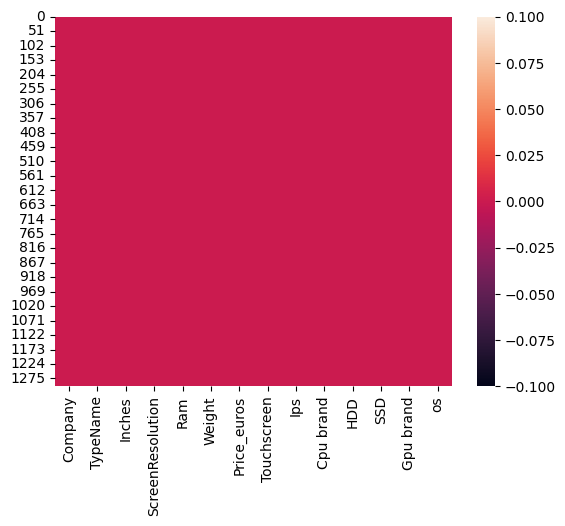

In [79]:
sns.heatmap(df.isnull())